In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 100

In [21]:
data = np.loadtxt('ex1data1.txt')
m = data.shape[0]

# Training Data
train_X = np.reshape(data[:, 0], (m, 1))
train_X = np.c_[np.ones([m, 1]), train_X]    # Add a column of ones to x
train_Y = np.reshape(data[:, 1], (m, 1))

In [22]:
# tf Graph Input
X = tf.placeholder(tf.float32, shape=(m, 2))
Y = tf.placeholder(tf.float32, shape=(m, 1))

# Set model weights
theta = tf.Variable(tf.zeros([2, 1]), name="theta") 

In [23]:
# Construct a linear model
pred = tf.matmul(X, theta) # X.shape=(m, 2); theta.shape=(2, 1)
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*m)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 100 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 200 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 300 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 400 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 500 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 600 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 700 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 800 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 900 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 1000 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 1100 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 1200 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 1300 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 1400 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 1500 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 1600 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 1700 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 1800 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 1900 cost= 32.072735 W= 0.0 b= 0.0
Epoch: 2000 cost= 32.072735 W= 0.0 b= 0.0
Optimization Finished!
Training cost= 32.072735 W= 0.0 b= 0.0 



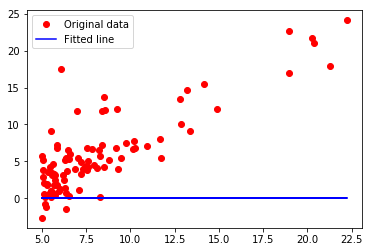

In [24]:
# 开始训练
with tf.Session() as sess:

    # 执行初始化操作
    sess.run(tf.global_variables_initializer())

    # 拟合模型数据
    for epoch in range(training_epochs):
#        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
        sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        
        # 每50次迭代后在控制台输出模型当前训练的loss以及权重大小
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", (epoch+1), "cost=", c, "W=", theta[1][0].eval(), "b=", theta[0][0].eval())

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", theta[1][0].eval(), "b=", theta[0][0].eval(), '\n')

    # 画出拟合图像
    plt.plot(train_X[:,1], train_Y, 'ro', label='Original data')
    plt.plot(train_X[:,1], sess.run(theta[1][0]) * train_X[:,1] + sess.run(theta[0][0]), label='Fitted line', color='b')
    plt.legend()
    plt.show()    
